# Hyper Parameter Tuning

## **1. Key Hyperparameters in t-SNE**

| Hyperparameter       | Role                                     | Typical Range               | Effect                                                                       |
| -------------------- | ---------------------------------------- | --------------------------- | ---------------------------------------------------------------------------- |
| `perplexity`         | Controls the effective neighborhood size | 5–50                        | Low → focuses on very local structure; High → includes more global structure |
| `learning_rate`      | Step size for gradient descent           | 10–1000                     | Too low → slow convergence; too high → unstable embedding                    |
| `n_iter`             | Number of iterations                     | 250–1000+                   | Too few → embedding may not converge                                         |
| `init`               | Initial embedding                        | 'random' or 'pca'           | PCA init often gives faster convergence and more stable results              |
| `metric`             | Distance metric                          | 'euclidean', 'cosine', etc. | Should reflect similarity in high-D space                                    |
| `early_exaggeration` | Temporarily inflates $p_{ij}$            | Default 12                  | Helps separate clusters in early optimization                                |

---

## **2. How to Tune t-SNE**

### **a) Perplexity**

* Most important hyperparameter.
* **Guideline:**

  * Smaller datasets → lower perplexity (5–30)
  * Larger datasets → higher perplexity (30–50)
* Too low → clusters may fragment.
* Too high → clusters may merge or lose local detail.

### **b) Learning Rate**

* Controls the speed of optimization.
* Start with default (\~200) and adjust if:

  * Points collapse into a tight blob → increase learning rate.
  * Points scatter randomly → decrease learning rate.

### **c) Number of Iterations (`n_iter`)**

* t-SNE needs enough iterations for gradient descent to converge.
* Typical: 1000–2000 iterations for 2D embedding.
* Visual check: if clusters are still moving after final iteration → increase `n_iter`.

### **d) Initialization**

* Random → may give slightly different embeddings on each run.
* PCA → more stable and faster convergence.

---

## **3. Practical Tips**

1. **Try multiple perplexities**: Compare embeddings to see which best preserves cluster structure.
2. **Visual inspection is key**: There is no quantitative accuracy metric.
3. **Use PCA preprocessing**: Reduce to 30–50 dimensions before t-SNE for noisy/high-dimensional data.
4. **Fix random seed**: Ensures reproducibility.
5. **Avoid extremely large datasets**: t-SNE scales poorly; consider subsampling or FIt-SNE for large data.

---

**Intuition**

* **Perplexity** → “how many neighbors matter”
* **Learning rate** → “how fast the points move to match neighbors”
* **Iterations** → “how long we allow points to settle into a stable map”
* **Initialization** → “starting configuration for optimization”

> Think of t-SNE like **folding a high-dimensional map onto 2D**: these hyperparameters control the scale, speed, and smoothness of the folding.


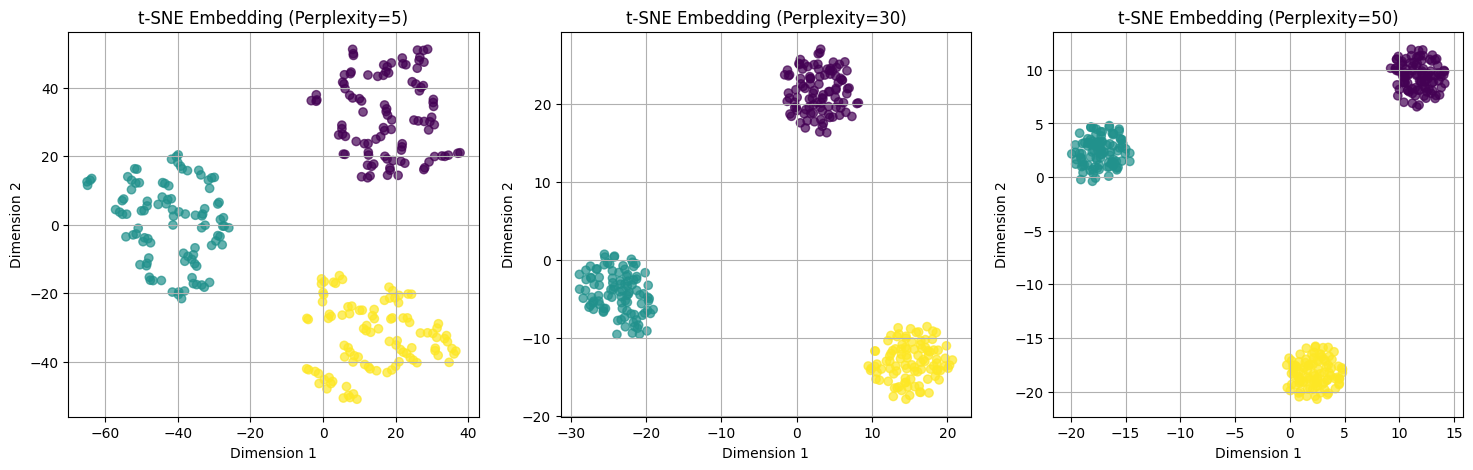

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Step 1: Generate synthetic 5D dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, n_features=5, cluster_std=1.0, random_state=42)

# Step 2: Define different perplexities
perplexities = [5, 30, 50]
tsne_embeddings = []

# Step 3: Apply t-SNE with different perplexities
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_embedded = tsne.fit_transform(X)
    tsne_embeddings.append(X_embedded)

# Step 4: Plot embeddings
plt.figure(figsize=(18, 5))

for i, p in enumerate(perplexities):
    plt.subplot(1, 3, i+1)
    plt.scatter(tsne_embeddings[i][:, 0], tsne_embeddings[i][:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f"t-SNE Embedding (Perplexity={p})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)

plt.show()


### **What You Will Observe**

1. **Perplexity = 5 (small)**

   * Very local neighborhoods are emphasized.
   * Clusters may appear fragmented.

2. **Perplexity = 30 (moderate, default)**

   * Balanced local and global structure.
   * Clusters are well-separated and visually meaningful.

3. **Perplexity = 50 (large)**

   * Neighborhoods are larger → points from different clusters may appear closer.
   * Global structure becomes more prominent, but local cluster details may blur.

---

### **Intuition**

* **Perplexity is like “how many neighbors each point cares about”**.
* Smaller → emphasizes fine-grained local structure.
* Larger → smooths out local details, emphasizes global structure.
